In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import gc
import seaborn as sns



In [2]:
df=pd.read_csv('train.csv')
print(df.shape[0])


404290


In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.groupby("is_duplicate")['id'].count()[1]



    

149263

In [6]:
df['is_duplicate'].mean()*100

36.9197853026293

In [7]:
print(df.groupby("is_duplicate")['id'].count()[1]/df.shape[0]*100)

36.9197853026293


In [8]:
quids=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
unique_qs=len(np.unique(quids))
print('Total Number of Unique Questions',unique_qs)


Total Number of Unique Questions 537933


In [9]:
nan_rows=df[df.isnull().any(1)]
print(nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


Maximum number of times a single question is repeated: 157



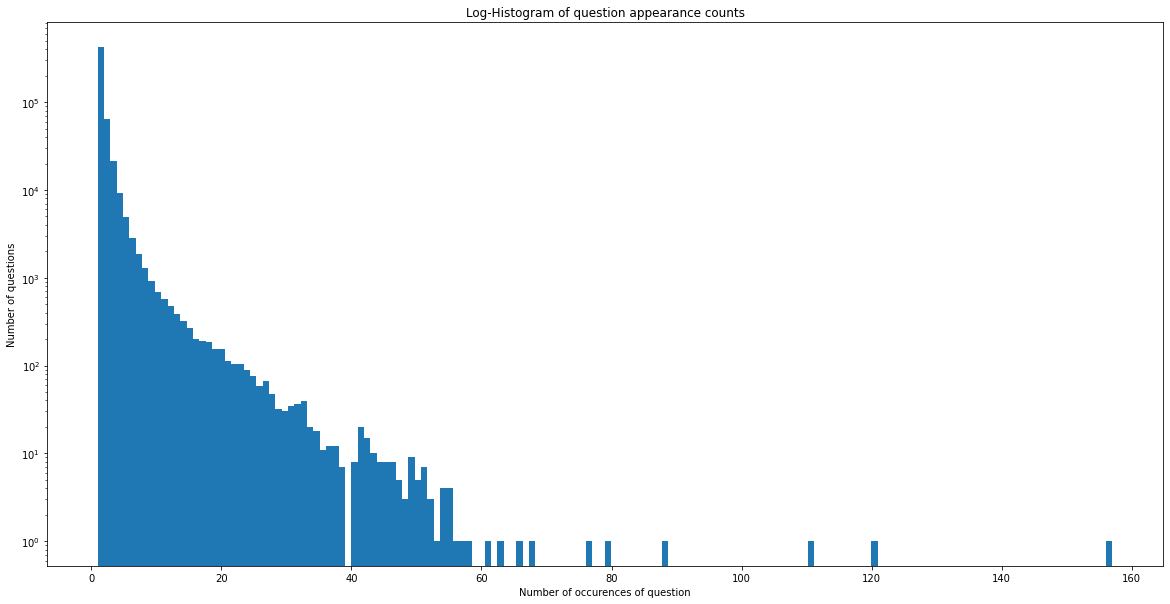

In [10]:
plt.figure(figsize=(20, 10))

plt.hist(quids.value_counts(), bins=160)

plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(quids.value_counts()))) 

In [11]:
df['freq_qid1']=df.groupby('qid1')['qid1'].transform('count')
df['freq_qid2']=df.groupby('qid2')['qid2'].transform('count')
df['q1len']=df['question1'].str.len()
df['q2len']=df['question2'].str.len()
df['q1_n_words']=df['question1'].apply(lambda row:len(str(row).split()))
df['q2_n_words']=df['question2'].apply(lambda row:len(str(row).split()))
print(df.head())




   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  freq_qid1  \
0  What is the step by step guide to invest in sh...             0          1   
1  What would happen if the Indian government sto...             0          4   
2  How can Internet speed be increased by hacking...             0          1   
3  Find the remainder when [math]23^{24}[/math] i...             0          1   
4            Which fish would survive in salt water?             0          3   

   freq_qid2  q1len  q2len  q1_n_words  q2_n_words  
0          1   66.0   57.0 

In [12]:
def word_co(r):
    w1=set(map(lambda word:word.lower().strip(),str(r['question1']).split()))
    w2=set(map(lambda word:word.lower().strip(),str(r['question2']).split()))
    return 1*len(w1&w2)
df['word_Common']=df.apply(word_co,axis=1)
def n_word_Total(r):
    w1=set(map(lambda word:word.lower().strip(),str(r['question1']).split()))
    w2=set(map(lambda word:word.lower().strip(),str(r['question2']).split()))
    return 1.0*(len(w1)+len(w2))
df['word_Total']=df.apply(n_word_Total,axis=1)

def n_word_Share(r):
    w1=set(map(lambda word:word.lower().strip(),str(r['question1']).split()))
    w2=set(map(lambda word:word.lower().strip(),str(r['question2']).split()))
    return 1*len(w1&w2)/(len(w1)+len(w2))
df['word_share']=df.apply(n_word_Share,axis=1)


df['freq_q1+q2']=df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2']=abs(df['freq_qid1']-df['freq_qid2'])


In [13]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66.0,57.0,14,12,10,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51.0,88.0,8,13,4,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73.0,59.0,14,10,4,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50.0,65.0,11,9,0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76.0,39.0,13,7,2,20.0,0.100000,4,2


In [14]:
print('Minimum length of the question1:',min(df['q1_n_words']))
print('Maximum length of question1:',max(df['q1_n_words']))
print('Minimum lenfth of q2:',min('q2__n_words'))
print('Maximum length of question2:',max(df['q2_n_words']))

Minimum length of the question1: 1
Maximum length of question1: 125
Minimum lenfth of q2: 2
Maximum length of question2: 237


In [15]:
print('Number of Questions with minimum length (question1)',df[df['q1_n_words']==1].shape[0])
print('Number of Questions with minimum length (question2)',df[df['q2_n_words']==1].shape[0])

Number of Questions with minimum length (question1) 70
Number of Questions with minimum length (question2) 27


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


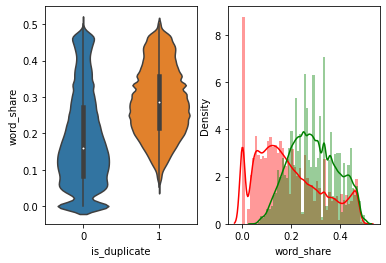

In [16]:
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='word_share',data=df[0:])
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0]['word_share'],label='0',color='red')
sns.distplot(df[df['is_duplicate']==1]['word_share'],label='1',color='green')
plt.show()

## Pre Processing of Text
###### Removing html tags
###### removing stop words
###### Remove Punctuations
###### Perform Stemming
###### Expanding contractions


In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import distance
from fuzzywuzzy import fuzz
stop_words=stopwords.words('English')


def preprocess(x):
    x=str(x).lower()
    
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    
 
    x=re.sub(r'[0-9]+000',r'1k',x)
    
    porter=PorterStemmer()
    pattern=re.compile('\W')
    
    
    if type(x)==type(''):
        x=re.sub(pattern,' ',x)
    if type(x)==type(''):
        x=porter.stem(x)
        example1=BeautifulSoup(x)
        x=example1.get_text()
    return x

C:\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Definition:

Token: You get a token by splitting sentence a space
Stop_Word : stop words as per NLTK.
Word : A token that is not a stop_word
Features:

cwc_min : Ratio of common_word_count to min lenghth of word count of Q1 and Q2
cwc_min = common_word_count / (min(len(q1_words), len(q2_words))



cwc_max : Ratio of common_word_count to max lenghth of word count of Q1 and Q2
cwc_max = common_word_count / (max(len(q1_words), len(q2_words))



csc_min : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2
csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))



csc_max : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2
csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))



ctc_min : Ratio of common_token_count to min lenghth of token count of Q1 and Q2
ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))



ctc_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2
ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))



last_word_eq : Check if First word of both questions is equal or not
last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])



first_word_eq : Check if First word of both questions is equal or not
first_word_eq = int(q1_tokens[0] == q2_tokens[0])



abs_len_diff : Abs. length difference
abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))



mean_len : Average Token Length of both Questions
mean_len = (len(q1_tokens) + len(q2_tokens))/2



fuzz_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/



fuzz_partial_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/



token_sort_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

token_set_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

longest_substr_ratio : Ratio of length longest common substring to min lenghth of token count of Q1 and Q2
longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))

In [26]:
def get_token_features(q1,q2):
    token_features=[0.0]*10
    q1_tokens=q1.split()
    q2_tokens=q1.split()
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    q1_words=set([word for word in q1_tokens if word not in stop_words])
    q2_words=set([word for word in q2_tokens if word not in stop_words])
    
    q1_stops=set([word for word in q1_tokens if word in stop_words])
    q2_stops=set([word for word in q2_tokens if word in stop_words])
    common_word_count=len(q1_words.intersection(q2_words))
    common_stop_count=len(q1_words.intersection(q2_words))
    
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))
    
    if len(q1_words)==0 and len(q2_words)==0:
         token_features[0]=0
    
    elif len(q1_words)==0 :
         token_features[0]=common_stop_count/len(q2_words)
    elif len(q2_words)==0:
         token_features[0]=common_stop_count/(len(q1_words))
    else:
        
        token_features[0]=common_stop_count/(min(len(q1_words),len(q2_words)))
        
    if len(q1_words)==0 and len(q2_words)==0:
         token_features[1]=0

    else:
        
        token_features[1]=common_stop_count/(max(len(q1_words),len(q2_words)))
        
        
    
    if len(q1_stops)==0 and len(q2_stops)==0:
         token_features[2]=0
    
    elif len(q1_stops)==0 :
         token_features[2]=common_stop_count/len(q2_stops)
    elif len(q2_stops)==0:
         token_features[2]=common_stop_count/(len(q1_stops))
    else:
        
        token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops)))
        
    if len(q1_stops)==0 and len(q2_stops)==0:
         token_features[3]=0
    
    
    else:
        
        token_features[3]=common_stop_count/(max(len(q1_stops),len(q2_stops)))
  
    token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens)))
    token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens)))
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])
    
    token_features[8]=abs(len(q1_tokens)-len(q2_tokens))
    token_features[9]=(len(q1_tokens)+len(q2_tokens))/2
    
    
    return token_features

def get_longest_substr_ratio(a,b):
    strs=list(distance.lcsubstrings(a,b))
    if len(strs)==0:
        return 0
    else:
        return len(strs[0])/(min(len(a),len(b)))
    
def extract_features(df):
    df['question1']=df['question1'].fillna('').apply(preprocess)
    df['question2']=df['question2'].fillna('').apply(preprocess)
    print('token features....')
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
    print("fuzzy features.....")
    
    df['token_set_ratio']=df.apply(lambda x:fuzz.token_set_ratio(x['question1'],x['question2']),axis=1)
    df['token_sort_ratio']=df.apply(lambda x:fuzz.token_sort_ratio(x['question1'],x['question2']),axis=1)
    df['fuzz_ratio']=df.apply(lambda x:fuzz.QRatio(x['question1'],x['question2']),axis=1)
    df['fuzz_partial_ratio']=df.apply(lambda x:fuzz.partial_ratio(x['question1'],x['question2']),axis=1)
    
    df['longest_substr_ratio']=df.apply(lambda x:get_longest_substr_ratio(x['question1'],x['question2']),axis=1)
    
    return df



df=extract_features(df)
df.to_csv('nlp_features.csv')

print(df.head())
    

token features....
fuzzy features.....
   id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve...   
4   4     9    10  which one dissolve in water quikly sugar  salt...   

                                           question2  is_duplicate  freq_qid1  \
0  what is the step by step guide to invest in sh...             0          1   
1  what would happen if the indian government sto...             0          4   
2  how can internet speed be increased by hacking...             0          1   
3  find the remainder when  math 23  24   math  i...             0          1   
4            which fish would survive in salt water              0          3   

   freq_qid2  q1len  q2len  ...   ctc_max

### 

In [27]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66.0,57.0,...,0.857143,1.0,1.0,0.0,14.0,100,93,93,100,1.000000
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51.0,88.0,...,1.000000,1.0,1.0,0.0,10.0,86,63,66,75,0.607843
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73.0,59.0,...,1.000000,1.0,1.0,0.0,14.0,63,63,43,47,0.169492
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50.0,65.0,...,0.909091,1.0,1.0,0.0,11.0,28,24,9,14,0.040000
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,3,1,76.0,39.0,...,1.000000,1.0,1.0,0.0,13.0,67,47,35,56,0.179487
